<a href="https://colab.research.google.com/github/KHN70/CN6005-Ai-Weekly-Portfolio/blob/main/Week_10_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
# Sample labeled dataset for training (you should replace this with your own dataset)
data = [
 ("I love this product", "positive"),
 ("This is terrible", "negative"),
 ("I am not sure about this", "neutral"),
 ("Absolutely fantastic experience!", "positive"),
 ("Couldn't be worse, a total disaster.", "negative"),
 ("It's okay, nothing special.", "neutral"),
 ("Fantastic customer service, highly recommend!", "positive"),
 ("Worst purchase ever, completely regret it.", "negative"),
 ("The product was decent, but nothing extraordinary.", "neutral"),
 ("I'm thrilled with the results!", "positive"),
 ("What a rip-off, don't buy this.", "negative"),
 ("It functions as expected, no complaints.", "neutral"),
 ("Amazing quality for the price.", "positive"),
 ("This utterly failed to meet expectations.", "negative"),
 ("My feelings are mixed, neither good nor bad.", "neutral"),
 ("This movie was fantastic and truly inspiring.", "positive"),
 ("I hated every minute of that customer service call.", "negative"),
 ("The food was edible, but not memorable.", "neutral"),
 ("Highly satisfied with my recent purchase.", "positive"),
 ("Complete waste of money, a fraudulent company.", "negative"),
 ("The performance was adequate, nothing groundbreaking.", "neutral"),
 ("Such a delightful surprise, exceeding all expectations!", "positive"),
 ("I'm so frustrated with the constant errors.", "negative"),
 ("It works as described, no major issues or praises.", "neutral"),
 ("This is the best book I've read all year!", "positive"),
 ("Never again will I use their services; utterly disappointed.", "negative"),
 ("The color is fine, matches the description.", "neutral"),
 ("A brilliant piece of art, thoroughly enjoyed it.", "positive"),
 ("Seriously flawed design, very inconvenient.", "negative"),
 ("It's neither good nor bad, just average.", "neutral"),
 ("Couldn't be happier with the outcome.", "positive"),
 ("Felt completely ripped off and cheated.", "negative"),
 ("The instruction manual was unclear, but I managed.", "neutral"),
 ("Exceptional quality and speedy delivery.", "positive"),
 ("This product broke within a week, terrible durability.", "negative"),
 ("My experience was indifferent, neither pleased nor upset.", "neutral"),
 ("A truly wonderful gift, I cherish it.", "positive"),
 ("Beware, this is a scam!", "negative"),
 ("The packaging was acceptable, nothing special.", "neutral"),
 ("Absolutely flawless experience from start to finish.", "positive"),
 ("I regret wasting my time on this.", "negative"),
 ("It serves its purpose adequately.", "neutral"),
 ("Highly impressed with the innovative features.", "positive"),
 ("This update ruined the app, full of bugs.", "negative"),
 ("The atmosphere was okay, a bit noisy.", "neutral"),
 ("Five stars all the way, perfection!", "positive"),
 ("Beyond horrible, a nightmare of a situation.", "negative"),
 ("I have no strong feelings about it either way.", "neutral"),
 ("The best decision I've made in a long time.", "positive"),
 ("Don't waste your money on this inferior product.", "negative"),
 ("The results were inconclusive, hard to tell.", "neutral")
 # Add more examples as needed
]

In [12]:
# Split the data into features (X) and labels (y)
X, y = zip(*data)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_counts, y_train)
# Make predictions on the test set
predictions = classifier.predict(X_test_counts)
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)


Accuracy: 0.73

Confusion Matrix (DataFrame):
          negative  neutral  positive
negative         3        2         0
neutral          0        2         0
positive         1        0         3

Confusion Matrix (Heatmap):


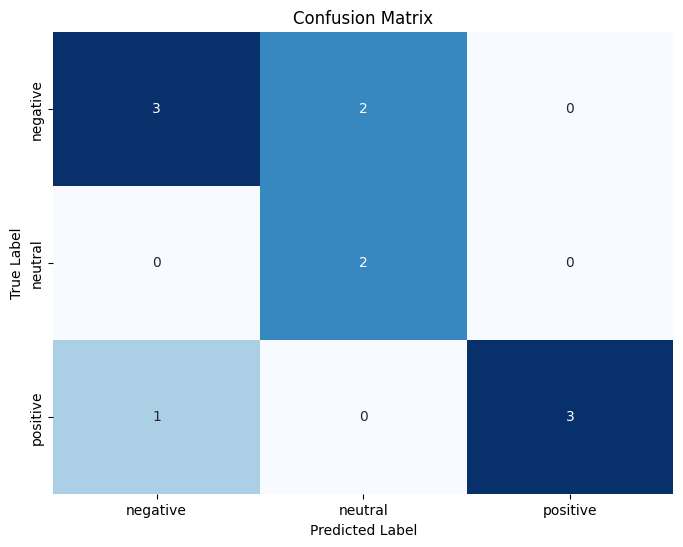


Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.60      0.67         5
     neutral       0.50      1.00      0.67         2
    positive       1.00      0.75      0.86         4

    accuracy                           0.73        11
   macro avg       0.75      0.78      0.73        11
weighted avg       0.80      0.73      0.74        11



In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Print results
print(f"Accuracy: {accuracy:.2f}")

print("\nConfusion Matrix (DataFrame):")
# Get the class labels from the classifier
labels = classifier.classes_
conf_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)
print(conf_df)

print("\nConfusion Matrix (Heatmap):")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report:")
print(class_report)